In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

In [24]:
df = pd.read_csv('sample_stock_data.csv')
print(df)

          Date        Open        High         Low       Close  Volume
0   2024-01-01  100.795980  102.327533   99.262535  100.496714    1833
1   2024-01-02  101.056897  101.566772   98.379974  100.358450    2823
2   2024-01-03  101.321364  101.685530  100.143055  101.006138    3774
3   2024-01-04  102.665785  104.099035  101.020965  102.529168    2982
4   2024-01-05  101.482364  103.936192  100.652585  102.295015    1853
..         ...         ...         ...         ...         ...     ...
60  2024-03-25   90.645479   90.818763   89.405141   90.241545    1116
61  2024-03-26   90.647471   90.973855   88.487617   90.055886    2853
62  2024-03-27   89.729562   90.811950   88.093677   88.949551    3838
63  2024-03-28   87.429335   88.612687   86.765245   87.753344    2150
64  2024-03-29   88.317036   89.283212   86.946133   88.565870    4464

[65 rows x 6 columns]


In [25]:
file = pd.DataFrame(df)
print(file)

          Date        Open        High         Low       Close  Volume
0   2024-01-01  100.795980  102.327533   99.262535  100.496714    1833
1   2024-01-02  101.056897  101.566772   98.379974  100.358450    2823
2   2024-01-03  101.321364  101.685530  100.143055  101.006138    3774
3   2024-01-04  102.665785  104.099035  101.020965  102.529168    2982
4   2024-01-05  101.482364  103.936192  100.652585  102.295015    1853
..         ...         ...         ...         ...         ...     ...
60  2024-03-25   90.645479   90.818763   89.405141   90.241545    1116
61  2024-03-26   90.647471   90.973855   88.487617   90.055886    2853
62  2024-03-27   89.729562   90.811950   88.093677   88.949551    3838
63  2024-03-28   87.429335   88.612687   86.765245   87.753344    2150
64  2024-03-29   88.317036   89.283212   86.946133   88.565870    4464

[65 rows x 6 columns]


In [26]:
file['Date'] = pd.to_datetime(file['Date'])
file['Daily_return'] = np.diff(file['Close'], prepend=file['Close'][0])/file['Close'].shift(1)
print(file)

         Date        Open        High         Low       Close  Volume  \
0  2024-01-01  100.795980  102.327533   99.262535  100.496714    1833   
1  2024-01-02  101.056897  101.566772   98.379974  100.358450    2823   
2  2024-01-03  101.321364  101.685530  100.143055  101.006138    3774   
3  2024-01-04  102.665785  104.099035  101.020965  102.529168    2982   
4  2024-01-05  101.482364  103.936192  100.652585  102.295015    1853   
..        ...         ...         ...         ...         ...     ...   
60 2024-03-25   90.645479   90.818763   89.405141   90.241545    1116   
61 2024-03-26   90.647471   90.973855   88.487617   90.055886    2853   
62 2024-03-27   89.729562   90.811950   88.093677   88.949551    3838   
63 2024-03-28   87.429335   88.612687   86.765245   87.753344    2150   
64 2024-03-29   88.317036   89.283212   86.946133   88.565870    4464   

    Daily_return  
0            NaN  
1      -0.001376  
2       0.006454  
3       0.015079  
4      -0.002284  
..       

In [27]:
file['Avg_20Day'] = file['Close'].rolling(window=20).mean()
print(file)

         Date        Open        High         Low       Close  Volume  \
0  2024-01-01  100.795980  102.327533   99.262535  100.496714    1833   
1  2024-01-02  101.056897  101.566772   98.379974  100.358450    2823   
2  2024-01-03  101.321364  101.685530  100.143055  101.006138    3774   
3  2024-01-04  102.665785  104.099035  101.020965  102.529168    2982   
4  2024-01-05  101.482364  103.936192  100.652585  102.295015    1853   
..        ...         ...         ...         ...         ...     ...   
60 2024-03-25   90.645479   90.818763   89.405141   90.241545    1116   
61 2024-03-26   90.647471   90.973855   88.487617   90.055886    2853   
62 2024-03-27   89.729562   90.811950   88.093677   88.949551    3838   
63 2024-03-28   87.429335   88.612687   86.765245   87.753344    2150   
64 2024-03-29   88.317036   89.283212   86.946133   88.565870    4464   

    Daily_return  Avg_20Day  
0            NaN        NaN  
1      -0.001376        NaN  
2       0.006454        NaN  
3  

In [28]:
detect_hightest = file['Close'].rolling(window=20).max()
detect_lowest = file['Close'].rolling(window=20).min()

print(detect_hightest)
print(detect_lowest)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
60    92.164361
61    92.048713
62    91.747609
63    90.720719
64    90.720719
Name: Close, Length: 65, dtype: float64
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
60    87.988384
61    87.988384
62    87.988384
63    87.753344
64    87.753344
Name: Close, Length: 65, dtype: float64


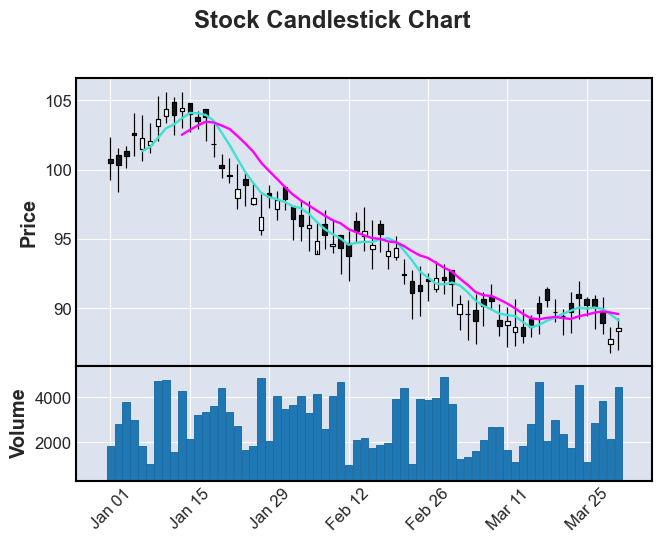

In [31]:
file['Date'] = pd.to_datetime(file['Date'])
file.set_index('Date', inplace=True)
mpf.plot(file, type='candle', mav=(5,10), volume=True, title="Stock Candlestick Chart")
